In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
file_path = "C:/Users/Akif/Desktop/football/rankingv5v2.csv" 
data = pd.read_csv(file_path)

In [13]:
data.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,away_defender_count,home_goalkeeper_value,home_goalkeeper_count,away_goalkeeper_value,away_goalkeeper_count,home_total_market_value,away_total_market_value,home_power_score,away_power_score,predicted_winner
0,2482105,FR1,2014,1. Matchday,2014-08-08,1421,583,2,2,11.0,...,4,-0.713016,1,0.387475,1,-0.668870,3.077390,-1.026745,1.025068,Away
1,2482107,FR1,2014,1. Matchday,2014-08-09,14171,1162,0,3,20.0,...,4,-0.757590,1,-0.672047,1,-1.113014,-1.021345,-1.240296,-0.767677,Away
2,2482111,FR1,2014,1. Matchday,2014-08-09,995,826,1,0,7.0,...,3,-0.674014,1,-0.761270,1,-0.401712,-0.496393,-0.808821,-0.927927,Home
3,2482106,FR1,2014,1. Matchday,2014-08-09,595,244,3,3,9.0,...,5,0.161744,1,0.136535,1,-1.006696,0.203683,-1.021536,-0.268694,Away
4,2482110,FR1,2014,1. Matchday,2014-08-09,969,40,0,1,17.0,...,4,-0.534721,1,-0.253815,1,-0.554164,-0.860063,-0.948659,-0.981967,Home


In [14]:
le = LabelEncoder()

data['home_club_formation'] = le.fit_transform(data['home_club_formation'])
data['away_club_formation'] = le.fit_transform(data['away_club_formation'])

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

feature_cols = [col for col in data.columns if col not in ['home_team_points', 'away_team_points', 'home_attack_value',
    'away_attack_value', 'home_midfield_value', 'away_midfield_value',
    'home_defender_value', 'away_defender_value', 'home_goalkeeper_value',
    'away_goalkeeper_value', 'home_total_market_value', 'away_total_market_value',
    'home_power_score', 'away_power_score']]
X = data[feature_cols]
y = data['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [16]:
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Draw', 'Home Win', 'Away Win'])

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.9985
Classification Report:
              precision    recall  f1-score   support

        Draw       1.00      1.00      1.00      1316
    Home Win       1.00      1.00      1.00      2471
    Away Win       1.00      1.00      1.00      1635

    accuracy                           1.00      5422
   macro avg       1.00      1.00      1.00      5422
weighted avg       1.00      1.00      1.00      5422



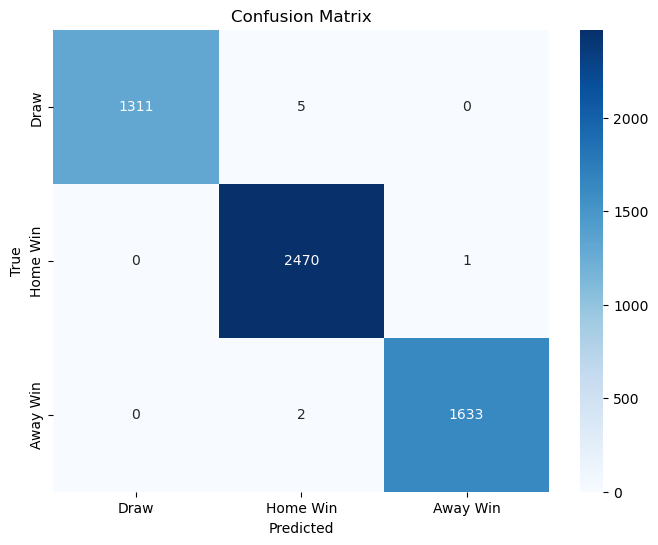

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Draw', 'Home Win', 'Away Win'], 
            yticklabels=['Draw', 'Home Win', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
def predict_match_outcome(home_team_id, away_team_id):
    # Find the row matching the home and away team IDs
    match_row = data[(data['home_club_id'] == home_team_id) & (data['away_club_id'] == away_team_id)]
    
    if match_row.empty:
        print("No match found for the given team IDs.")
        return None
    
    # Prepare the feature set
    X_match = match_row[feature_cols].copy()
    
    # Normalize the features using the same scaler used during training
    X_match_scaled = scaler.transform(X_match)
    
    # Predict probabilities
    probabilities = svm_model.predict_proba(X_match_scaled)[0]
    
    # Map probabilities to outcomes
    outcome_labels = ['Draw', 'Home Win', 'Away Win']
    prediction = dict(zip(outcome_labels, probabilities))
    
    return prediction

In [19]:
# Example IDs (Replace these with actual team IDs from your dataset)
home_team_id = 1421
away_team_id = 583

prediction = predict_match_outcome(home_team_id, away_team_id)
if prediction:
    print(f"Prediction Probabilities:\n{prediction}")


Prediction Probabilities:
{'Draw': 0.9999838890158014, 'Home Win': 1.0262769987742675e-05, 'Away Win': 5.848214210996206e-06}
